In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import alexnet

#from lib import datasets

from lib.datasets import datasets, generate_degset, mnist_loader
from lib.utils import train, alex_classifier, pac_label_to_string, save_model, load_model, list_models, compute_error_rate

cuda = torch.cuda.is_available()

from lib.utils import to_3channels

%run HEX.ipynb

# PACS TESTS

In [2]:
ds = datasets()
ds.create_dataset('pacs', pacs='art_painting', pacs_heuristic=True)
batch_loader = ds.batch_loader(256)

epoch = 100
log_every = 10

loading param:  features.0.weight
loading param:  features.0.bias
loading param:  features.3.weight
loading param:  features.3.bias
loading param:  features.6.weight
loading param:  features.6.bias
loading param:  features.8.weight
loading param:  features.8.bias
loading param:  features.10.weight
loading param:  features.10.bias
loading param:  classifier.1.weight
loading param:  classifier.1.bias
loading param:  classifier.4.weight
loading param:  classifier.4.bias
Training the model!
Params to learn:
	 nglcm.0.a
	 nglcm.0.b
	 nglcm.2.weight
	 nglcm.2.bias
	 cnn.classifier.1.weight
	 cnn.classifier.1.bias
	 cnn.classifier.4.weight
	 cnn.classifier.4.bias
	 classifier.weight
	 classifier.bias
You can interrupt it at any time.
Minibatch     10  | loss  2.05 | err rate 74.00%
Minibatch     20  | loss  2.01 | err rate 53.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 64.55% | doing 100 epochs
-----------------------------------------------

Minibatch    670  | loss  0.60 | err rate 17.00%
----------------------------------------------------------
After epoch 25 | valid err rate: 54.30% | doing 100 epochs
----------------------------------------------------------
Minibatch    680  | loss  0.65 | err rate 19.00%
Minibatch    690  | loss  0.62 | err rate 19.00%
Minibatch    700  | loss  0.63 | err rate 18.00%
----------------------------------------------------------
After epoch 26 | valid err rate: 54.30% | doing 100 epochs
----------------------------------------------------------
Minibatch    710  | loss  0.61 | err rate 18.00%
Minibatch    720  | loss  0.56 | err rate 18.00%
----------------------------------------------------------
After epoch 27 | valid err rate: 54.35% | doing 100 epochs
----------------------------------------------------------
Minibatch    730  | loss  0.65 | err rate 20.00%
Minibatch    740  | loss  0.59 | err rate 17.00%
Minibatch    750  | loss  0.65 | err rate 20.00%
----------------------------

Minibatch   1380  | loss  0.57 | err rate 16.00%
Minibatch   1390  | loss  0.52 | err rate 16.00%
Minibatch   1400  | loss  0.47 | err rate 16.00%
----------------------------------------------------------
After epoch 52 | valid err rate: 54.74% | doing 100 epochs
----------------------------------------------------------
Minibatch   1410  | loss  0.54 | err rate 17.00%
Minibatch   1420  | loss  0.45 | err rate 17.00%
Minibatch   1430  | loss  0.52 | err rate 17.00%
----------------------------------------------------------
After epoch 53 | valid err rate: 54.49% | doing 100 epochs
----------------------------------------------------------
Minibatch   1440  | loss  0.52 | err rate 18.00%
Minibatch   1450  | loss  0.46 | err rate 16.00%
----------------------------------------------------------
After epoch 54 | valid err rate: 54.54% | doing 100 epochs
----------------------------------------------------------
Minibatch   1460  | loss  0.53 | err rate 16.00%
Minibatch   1470  | loss  0.

Minibatch   2110  | loss  0.48 | err rate 14.00%
Minibatch   2120  | loss  0.54 | err rate 18.00%
Minibatch   2130  | loss  0.48 | err rate 16.00%
----------------------------------------------------------
After epoch 79 | valid err rate: 55.27% | doing 100 epochs
----------------------------------------------------------
Minibatch   2140  | loss  0.55 | err rate 19.00%
Minibatch   2150  | loss  0.45 | err rate 13.00%
Minibatch   2160  | loss  0.42 | err rate 12.00%
----------------------------------------------------------
After epoch 80 | valid err rate: 55.08% | doing 100 epochs
----------------------------------------------------------
Minibatch   2170  | loss  0.48 | err rate 14.00%
Minibatch   2180  | loss  0.57 | err rate 20.00%
----------------------------------------------------------
After epoch 81 | valid err rate: 54.54% | doing 100 epochs
----------------------------------------------------------
Minibatch   2190  | loss  0.47 | err rate 17.00%
Minibatch   2200  | loss  0.

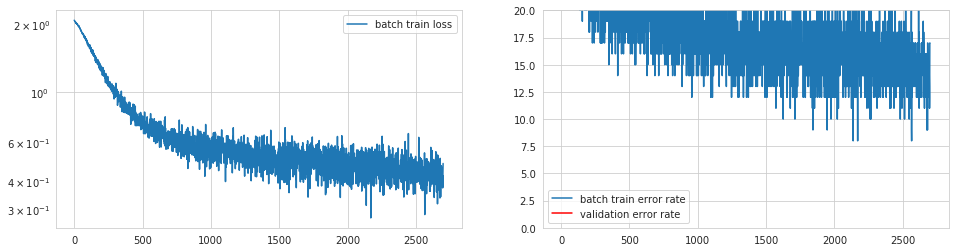

In [3]:
alex = alexnet(pretrained=False)
alex.classifier = alex_classifier(8)
load_model(alex, 'pacs_art_painting')

hexnet = HEX(dim=224, num_classes=8, alex_pretrained=False, alex_params = alex.state_dict())

for param in hexnet.cnn.features.parameters():
    param.requires_grad = False

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(hexnet.parameters(), lr=0.00001, weight_decay=0.00001)

train(hexnet, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)

In [6]:
save_model(hexnet, 'HEX_art_painting')

loading param:  features.0.weight
loading param:  features.0.bias
loading param:  features.3.weight
loading param:  features.3.bias
loading param:  features.6.weight
loading param:  features.6.bias
loading param:  features.8.weight
loading param:  features.8.bias
loading param:  features.10.weight
loading param:  features.10.bias
loading param:  classifier.1.weight
loading param:  classifier.1.bias
loading param:  classifier.4.weight
loading param:  classifier.4.bias
Training the model!
Params to learn:
	 nglcm.0.a
	 nglcm.0.b
	 nglcm.2.weight
	 nglcm.2.bias
	 cnn.classifier.1.weight
	 cnn.classifier.1.bias
	 cnn.classifier.4.weight
	 cnn.classifier.4.bias
	 classifier.weight
	 classifier.bias
You can interrupt it at any time.
Minibatch     10  | loss  2.06 | err rate 80.00%
Minibatch     20  | loss  2.02 | err rate 71.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 62.37% | doing 100 epochs
-----------------------------------------------

Minibatch    660  | loss  0.70 | err rate 21.00%
Minibatch    670  | loss  0.77 | err rate 24.00%
----------------------------------------------------------
After epoch 26 | valid err rate: 42.83% | doing 100 epochs
----------------------------------------------------------
Minibatch    680  | loss  0.73 | err rate 25.00%
Minibatch    690  | loss  0.72 | err rate 24.00%
Minibatch    700  | loss  0.76 | err rate 24.00%
----------------------------------------------------------
After epoch 27 | valid err rate: 42.92% | doing 100 epochs
----------------------------------------------------------
Minibatch    710  | loss  0.78 | err rate 24.00%
Minibatch    720  | loss  0.78 | err rate 27.00%
----------------------------------------------------------
After epoch 28 | valid err rate: 42.83% | doing 100 epochs
----------------------------------------------------------
Minibatch    730  | loss  0.75 | err rate 27.00%
Minibatch    740  | loss  0.80 | err rate 29.00%
Minibatch    750  | loss  0.

Minibatch   1360  | loss  0.63 | err rate 23.00%
Minibatch   1370  | loss  0.64 | err rate 21.00%
----------------------------------------------------------
After epoch 53 | valid err rate: 43.22% | doing 100 epochs
----------------------------------------------------------
Minibatch   1380  | loss  0.59 | err rate 20.00%
Minibatch   1390  | loss  0.64 | err rate 20.00%
Minibatch   1400  | loss  0.63 | err rate 18.00%
----------------------------------------------------------
After epoch 54 | valid err rate: 43.13% | doing 100 epochs
----------------------------------------------------------
Minibatch   1410  | loss  0.68 | err rate 23.00%
Minibatch   1420  | loss  0.62 | err rate 20.00%
Minibatch   1430  | loss  0.65 | err rate 23.00%
----------------------------------------------------------
After epoch 55 | valid err rate: 42.62% | doing 100 epochs
----------------------------------------------------------
Minibatch   1440  | loss  0.65 | err rate 24.00%
Minibatch   1450  | loss  0.

Minibatch   2060  | loss  0.53 | err rate 18.00%
Minibatch   2070  | loss  0.52 | err rate 18.00%
Minibatch   2080  | loss  0.66 | err rate 23.00%
----------------------------------------------------------
After epoch 80 | valid err rate: 43.05% | doing 100 epochs
----------------------------------------------------------
Minibatch   2090  | loss  0.68 | err rate 23.00%
Minibatch   2100  | loss  0.68 | err rate 25.00%
----------------------------------------------------------
After epoch 81 | valid err rate: 43.00% | doing 100 epochs
----------------------------------------------------------
Minibatch   2110  | loss  0.62 | err rate 21.00%
Minibatch   2120  | loss  0.46 | err rate 17.00%
Minibatch   2130  | loss  0.46 | err rate 14.00%
----------------------------------------------------------
After epoch 82 | valid err rate: 43.13% | doing 100 epochs
----------------------------------------------------------
Minibatch   2140  | loss  0.61 | err rate 22.00%
Minibatch   2150  | loss  0.

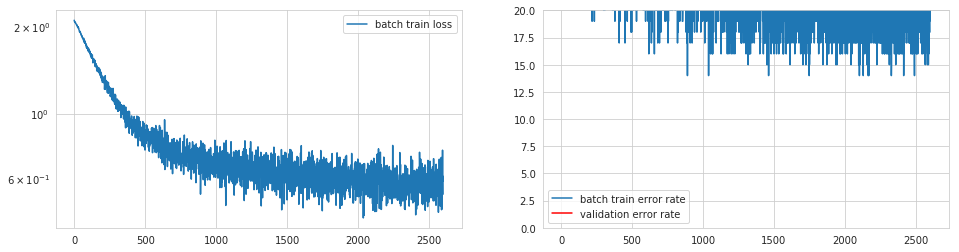

In [8]:
ds = datasets()
ds.create_dataset('pacs', pacs='cartoon', pacs_heuristic=True)
batch_loader = ds.batch_loader(256)

epoch = 100
log_every = 10

alex = alexnet(pretrained=False)
alex.classifier = alex_classifier(8)
load_model(alex, 'pacs_cartoon')

hexnet = HEX(dim=224, num_classes=8, alex_pretrained=False, alex_params = alex.state_dict())

for param in hexnet.cnn.features.parameters():
    param.requires_grad = False

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(hexnet.parameters(), lr=0.00001, weight_decay=0.00001)

train(hexnet, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)



In [ ]:
save_model(hexnet, 'HEX_cartoon')

loading param:  features.0.weight
loading param:  features.0.bias
loading param:  features.3.weight
loading param:  features.3.bias
loading param:  features.6.weight
loading param:  features.6.bias
loading param:  features.8.weight
loading param:  features.8.bias
loading param:  features.10.weight
loading param:  features.10.bias
loading param:  classifier.1.weight
loading param:  classifier.1.bias
loading param:  classifier.4.weight
loading param:  classifier.4.bias
Training the model!
Params to learn:
	 nglcm.0.a
	 nglcm.0.b
	 nglcm.2.weight
	 nglcm.2.bias
	 cnn.classifier.1.weight
	 cnn.classifier.1.bias
	 cnn.classifier.4.weight
	 cnn.classifier.4.bias
	 classifier.weight
	 classifier.bias
You can interrupt it at any time.
Minibatch     10  | loss  2.03 | err rate 69.00%
Minibatch     20  | loss  2.00 | err rate 54.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 49.88% | doing 100 epochs
-----------------------------------------------

Minibatch    700  | loss  0.90 | err rate 28.00%
Minibatch    710  | loss  0.80 | err rate 26.00%
Minibatch    720  | loss  0.84 | err rate 29.00%
----------------------------------------------------------
After epoch 25 | valid err rate: 37.78% | doing 100 epochs
----------------------------------------------------------
Minibatch    730  | loss  0.84 | err rate 29.00%
Minibatch    740  | loss  0.83 | err rate 28.00%
Minibatch    750  | loss  0.81 | err rate 27.00%
----------------------------------------------------------
After epoch 26 | valid err rate: 37.90% | doing 100 epochs
----------------------------------------------------------
Minibatch    760  | loss  0.76 | err rate 21.00%
Minibatch    770  | loss  0.80 | err rate 23.00%
Minibatch    780  | loss  0.72 | err rate 20.00%
----------------------------------------------------------
After epoch 27 | valid err rate: 38.14% | doing 100 epochs
----------------------------------------------------------
Minibatch    790  | loss  0.

Minibatch   1460  | loss  0.86 | err rate 32.00%
Minibatch   1470  | loss  0.68 | err rate 22.00%
----------------------------------------------------------
After epoch 51 | valid err rate: 37.07% | doing 100 epochs
----------------------------------------------------------
Minibatch   1480  | loss  0.78 | err rate 26.00%
Minibatch   1490  | loss  0.77 | err rate 25.00%
Minibatch   1500  | loss  0.71 | err rate 24.00%
----------------------------------------------------------
After epoch 52 | valid err rate: 37.01% | doing 100 epochs
----------------------------------------------------------
Minibatch   1510  | loss  0.72 | err rate 26.00%
Minibatch   1520  | loss  0.75 | err rate 27.00%
Minibatch   1530  | loss  0.70 | err rate 26.00%
----------------------------------------------------------
After epoch 53 | valid err rate: 36.95% | doing 100 epochs
----------------------------------------------------------
Minibatch   1540  | loss  0.69 | err rate 24.00%
Minibatch   1550  | loss  0.

Minibatch   2210  | loss  0.68 | err rate 24.00%
Minibatch   2220  | loss  0.66 | err rate 22.00%
Minibatch   2230  | loss  0.71 | err rate 25.00%
----------------------------------------------------------
After epoch 77 | valid err rate: 36.41% | doing 100 epochs
----------------------------------------------------------
Minibatch   2240  | loss  0.63 | err rate 19.00%
Minibatch   2250  | loss  0.62 | err rate 19.00%
Minibatch   2260  | loss  0.65 | err rate 20.00%
----------------------------------------------------------
After epoch 78 | valid err rate: 36.47% | doing 100 epochs
----------------------------------------------------------
Minibatch   2270  | loss  0.71 | err rate 22.00%
Minibatch   2280  | loss  0.70 | err rate 23.00%
Minibatch   2290  | loss  0.65 | err rate 22.00%
----------------------------------------------------------
After epoch 79 | valid err rate: 36.11% | doing 100 epochs
----------------------------------------------------------
Minibatch   2300  | loss  0.

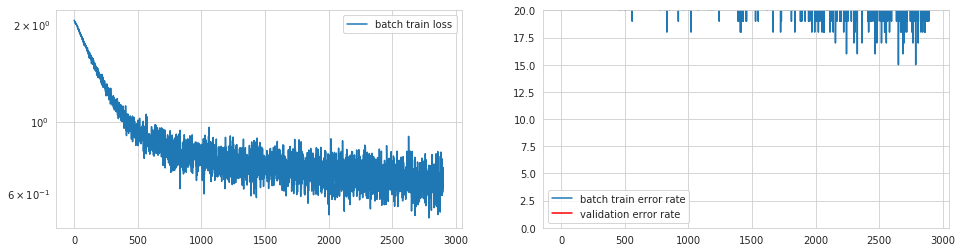

In [2]:
ds = datasets()
ds.create_dataset('pacs', pacs='photo', pacs_heuristic=True)
batch_loader = ds.batch_loader(256)

epoch = 100
log_every = 10

alex = alexnet(pretrained=False)
alex.classifier = alex_classifier(8)
load_model(alex, 'pacs_photo')

hexnet = HEX(dim=224, num_classes=8, alex_pretrained=False, alex_params = alex.state_dict())

for param in hexnet.cnn.features.parameters():
    param.requires_grad = False

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(hexnet.parameters(), lr=0.00001, weight_decay=0.00001)

train(hexnet, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)



In [3]:
save_model(hexnet, 'HEX_photo')

loading param:  features.0.weight
loading param:  features.0.bias
loading param:  features.3.weight
loading param:  features.3.bias
loading param:  features.6.weight
loading param:  features.6.bias
loading param:  features.8.weight
loading param:  features.8.bias
loading param:  features.10.weight
loading param:  features.10.bias
loading param:  classifier.1.weight
loading param:  classifier.1.bias
loading param:  classifier.4.weight
loading param:  classifier.4.bias
Training the model!
Params to learn:
	 nglcm.0.a
	 nglcm.0.b
	 nglcm.2.weight
	 nglcm.2.bias
	 cnn.classifier.1.weight
	 cnn.classifier.1.bias
	 cnn.classifier.4.weight
	 cnn.classifier.4.bias
	 classifier.weight
	 classifier.bias
You can interrupt it at any time.
Minibatch     10  | loss  2.03 | err rate 62.00%
Minibatch     20  | loss  2.01 | err rate 53.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 78.67% | doing 100 epochs
-----------------------------------------------

Minibatch    570  | loss  0.92 | err rate 27.00%
Minibatch    580  | loss  0.83 | err rate 25.00%
----------------------------------------------------------
After epoch 28 | valid err rate: 47.65% | doing 100 epochs
----------------------------------------------------------
Minibatch    590  | loss  0.89 | err rate 26.00%
Minibatch    600  | loss  0.92 | err rate 31.00%
----------------------------------------------------------
After epoch 29 | valid err rate: 47.59% | doing 100 epochs
----------------------------------------------------------
Minibatch    610  | loss  0.83 | err rate 25.00%
Minibatch    620  | loss  0.99 | err rate 32.00%
Minibatch    630  | loss  0.85 | err rate 28.00%
----------------------------------------------------------
After epoch 30 | valid err rate: 47.93% | doing 100 epochs
----------------------------------------------------------
Minibatch    640  | loss  0.92 | err rate 30.00%
Minibatch    650  | loss  0.90 | err rate 30.00%
----------------------------

----------------------------------------------------------
After epoch 57 | valid err rate: 48.84% | doing 100 epochs
----------------------------------------------------------
Minibatch   1200  | loss  0.70 | err rate 25.00%
Minibatch   1210  | loss  0.76 | err rate 25.00%
----------------------------------------------------------
After epoch 58 | valid err rate: 48.77% | doing 100 epochs
----------------------------------------------------------
Minibatch   1220  | loss  0.84 | err rate 29.00%
Minibatch   1230  | loss  0.71 | err rate 23.00%
----------------------------------------------------------
After epoch 59 | valid err rate: 48.79% | doing 100 epochs
----------------------------------------------------------
Minibatch   1240  | loss  0.85 | err rate 28.00%
Minibatch   1250  | loss  0.67 | err rate 23.00%
Minibatch   1260  | loss  0.75 | err rate 24.00%
----------------------------------------------------------
After epoch 60 | valid err rate: 48.87% | doing 100 epochs
--------

Minibatch   1810  | loss  0.69 | err rate 21.00%
Minibatch   1820  | loss  0.67 | err rate 21.00%
----------------------------------------------------------
After epoch 87 | valid err rate: 47.95% | doing 100 epochs
----------------------------------------------------------
Minibatch   1830  | loss  0.73 | err rate 25.00%
Minibatch   1840  | loss  0.73 | err rate 23.00%
----------------------------------------------------------
After epoch 88 | valid err rate: 47.95% | doing 100 epochs
----------------------------------------------------------
Minibatch   1850  | loss  0.70 | err rate 23.00%
Minibatch   1860  | loss  0.78 | err rate 29.00%
----------------------------------------------------------
After epoch 89 | valid err rate: 47.82% | doing 100 epochs
----------------------------------------------------------
Minibatch   1870  | loss  0.68 | err rate 22.00%
Minibatch   1880  | loss  0.68 | err rate 24.00%
Minibatch   1890  | loss  0.89 | err rate 32.00%
----------------------------

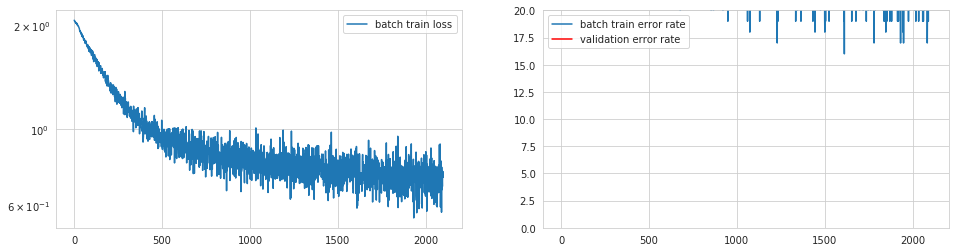

In [2]:
ds = datasets()
ds.create_dataset('pacs', pacs='sketch', pacs_heuristic=True)
batch_loader = ds.batch_loader(256)

epoch = 100
log_every = 10

alex = alexnet(pretrained=False)
alex.classifier = alex_classifier(8)
load_model(alex, 'pacs_sketch')

hexnet = HEX(dim=224, num_classes=8, alex_pretrained=False, alex_params = alex.state_dict())

for param in hexnet.cnn.features.parameters():
    param.requires_grad = False

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(hexnet.parameters(), lr=0.00001, weight_decay=0.00001)

train(hexnet, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)



In [3]:
save_model(hexnet, 'HEX_sketch')

In [4]:
list_models()

['pacs_cartoon_full',
 'pacs_sketch_full',
 '.ipynb_checkpoints',
 'pacs_sketch',
 'pacs_sketch_extra',
 'HEX_sketch',
 'HEX_cartoon',
 'HEX_photo',
 'pacs_art_painting_extra',
 'pacs_art_painting_full',
 'HEX_art_painting_51',
 'pacs_photo_extra',
 'pacs_cartoon',
 'pacs_art_painting',
 'pacs_photo_full',
 'pacs_photo',
 'pacs_cartoon_extra']

In [2]:
e_sum = 0

net = HEX(dim=224, num_classes=8, alex_pretrained=False)
ds = datasets()

# '' or '_full' or '_extra'
var = '' 

for name in ['art_painting', 'photo', 'sketch']:
    load_model(net, 'HEX_' + name + var)
    if cuda:
        net.cuda()
    
    ds.create_dataset('pacs', pacs=name)
    batch_loader = ds.batch_loader(256)
    
    res = compute_error_rate(net, batch_loader['test'], cuda)
    res = 100 - res
    print('HEX ', name, ' domain accuracy: ', res , "")
    e_sum += res

# taken from cartoon train block
e_sum += (100 -  42.28)
    
print('HEX cartoon domain accuracy: ', 100 - 42.28)
print('average accuracy for all: ', e_sum / 4.0)

HEX  art_painting  domain accuracy:  47.55859375 
HEX  photo  domain accuracy:  65.02994011976048 
HEX  sketch  domain accuracy:  53.32145584118096 
HEX cartoon domain accuracy:  57.72
average accuracy for all:  55.90749742773536


# MNIST ROTATION TESTS

In [2]:
data = generate_degset(size=100, img_size=224)
deg = {0 : 0, 15 : 1, 30 : 2, 45 : 3, 60 : 4, 75 : 5}

batch_size = 256
log_every = 10
epoch = 50

Training the model!
Params to learn:
	 nglcm.0.a
	 nglcm.0.b
	 nglcm.2.weight
	 nglcm.2.bias
	 cnn.features.0.weight
	 cnn.features.0.bias
	 cnn.features.3.weight
	 cnn.features.3.bias
	 cnn.features.6.weight
	 cnn.features.6.bias
	 cnn.features.8.weight
	 cnn.features.8.bias
	 cnn.features.10.weight
	 cnn.features.10.bias
	 cnn.classifier.1.weight
	 cnn.classifier.1.bias
	 cnn.classifier.4.weight
	 cnn.classifier.4.bias
	 classifier.weight
	 classifier.bias
You can interrupt it at any time.
Minibatch     10  | loss  1.57 | err rate 54.00%
Minibatch     20  | loss  0.86 | err rate 26.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 68.80% | doing  50 epochs
----------------------------------------------------------
Minibatch     30  | loss  0.41 | err rate 13.00%
Minibatch     40  | loss  0.41 | err rate 11.00%
----------------------------------------------------------
After epoch  2 | valid err rate: 42.00% | doing  50 epochs
------------

Minibatch    570  | loss  0.03 | err rate  1.00%
Minibatch    580  | loss  0.05 | err rate  1.00%
----------------------------------------------------------
After epoch 29 | valid err rate: 10.60% | doing  50 epochs
----------------------------------------------------------
Minibatch    590  | loss  0.08 | err rate  1.00%
Minibatch    600  | loss  0.01 | err rate  0.00%
----------------------------------------------------------
After epoch 30 | valid err rate: 12.90% | doing  50 epochs
----------------------------------------------------------
Minibatch    610  | loss  0.04 | err rate  1.00%
Minibatch    620  | loss  0.04 | err rate  1.00%
----------------------------------------------------------
After epoch 31 | valid err rate:  8.30% | doing  50 epochs
----------------------------------------------------------
Minibatch    630  | loss  0.04 | err rate  1.00%
Minibatch    640  | loss  0.06 | err rate  2.00%
----------------------------------------------------------
After epoch 32 | v

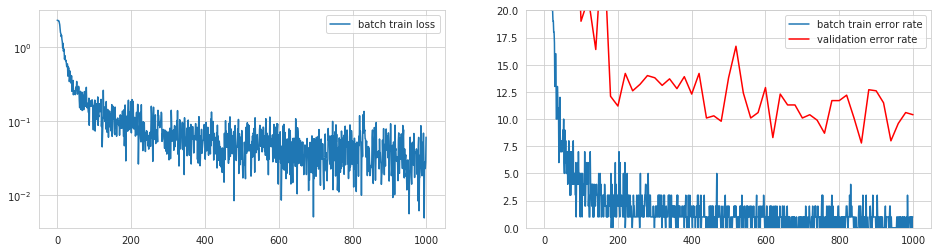

In [3]:
batch_loader = mnist_loader(deg[0], batch_size, data)

    
hexnet = HEX(dim=224, num_classes=10, alex_pretrained=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(hexnet.parameters(), lr=0.001, weight_decay=0.001)

train(hexnet, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)

In [4]:
save_model(hexnet, 'HEX_MNIST_0')

Training the model!
Params to learn:
	 nglcm.0.a
	 nglcm.0.b
	 nglcm.2.weight
	 nglcm.2.bias
	 cnn.features.0.weight
	 cnn.features.0.bias
	 cnn.features.3.weight
	 cnn.features.3.bias
	 cnn.features.6.weight
	 cnn.features.6.bias
	 cnn.features.8.weight
	 cnn.features.8.bias
	 cnn.features.10.weight
	 cnn.features.10.bias
	 cnn.classifier.1.weight
	 cnn.classifier.1.bias
	 cnn.classifier.4.weight
	 cnn.classifier.4.bias
	 classifier.weight
	 classifier.bias
You can interrupt it at any time.
Minibatch     10  | loss  2.02 | err rate 74.00%
Minibatch     20  | loss  1.11 | err rate 35.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 51.00% | doing  50 epochs
----------------------------------------------------------
Minibatch     30  | loss  0.63 | err rate 21.00%
Minibatch     40  | loss  0.47 | err rate 13.00%
----------------------------------------------------------
After epoch  2 | valid err rate: 22.80% | doing  50 epochs
------------

Minibatch    570  | loss  0.06 | err rate  2.00%
Minibatch    580  | loss  0.07 | err rate  2.00%
----------------------------------------------------------
After epoch 29 | valid err rate:  3.40% | doing  50 epochs
----------------------------------------------------------
Minibatch    590  | loss  0.06 | err rate  1.00%
Minibatch    600  | loss  0.05 | err rate  2.00%
----------------------------------------------------------
After epoch 30 | valid err rate:  2.80% | doing  50 epochs
----------------------------------------------------------
Minibatch    610  | loss  0.03 | err rate  1.00%
Minibatch    620  | loss  0.12 | err rate  5.00%
----------------------------------------------------------
After epoch 31 | valid err rate:  3.40% | doing  50 epochs
----------------------------------------------------------
Minibatch    630  | loss  0.02 | err rate  0.00%
Minibatch    640  | loss  0.14 | err rate  5.00%
----------------------------------------------------------
After epoch 32 | v

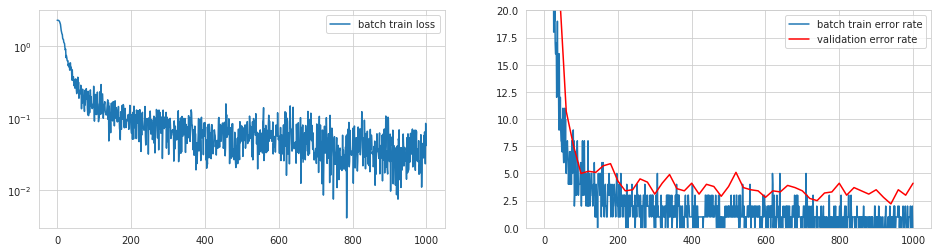

In [4]:
batch_loader = mnist_loader(deg[15], batch_size, data)

hexnet = HEX(dim=224, num_classes=10, alex_pretrained=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(hexnet.parameters(), lr=0.001, weight_decay=0.001)

train(hexnet, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)

In [5]:
save_model(hexnet, 'HEX_MNIST_15')

Training the model!
Params to learn:
	 nglcm.0.a
	 nglcm.0.b
	 nglcm.2.weight
	 nglcm.2.bias
	 cnn.features.0.weight
	 cnn.features.0.bias
	 cnn.features.3.weight
	 cnn.features.3.bias
	 cnn.features.6.weight
	 cnn.features.6.bias
	 cnn.features.8.weight
	 cnn.features.8.bias
	 cnn.features.10.weight
	 cnn.features.10.bias
	 cnn.classifier.1.weight
	 cnn.classifier.1.bias
	 cnn.classifier.4.weight
	 cnn.classifier.4.bias
	 classifier.weight
	 classifier.bias
You can interrupt it at any time.
Minibatch     10  | loss  2.03 | err rate 75.00%
Minibatch     20  | loss  1.14 | err rate 36.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 51.10% | doing  50 epochs
----------------------------------------------------------
Minibatch     30  | loss  0.71 | err rate 22.00%
Minibatch     40  | loss  0.56 | err rate 15.00%
----------------------------------------------------------
After epoch  2 | valid err rate: 38.00% | doing  50 epochs
------------

Minibatch    570  | loss  0.02 | err rate  0.00%
Minibatch    580  | loss  0.07 | err rate  2.00%
----------------------------------------------------------
After epoch 29 | valid err rate:  2.80% | doing  50 epochs
----------------------------------------------------------
Minibatch    590  | loss  0.10 | err rate  1.00%
Minibatch    600  | loss  0.13 | err rate  4.00%
----------------------------------------------------------
After epoch 30 | valid err rate:  3.10% | doing  50 epochs
----------------------------------------------------------
Minibatch    610  | loss  0.05 | err rate  1.00%
Minibatch    620  | loss  0.10 | err rate  4.00%
----------------------------------------------------------
After epoch 31 | valid err rate:  2.60% | doing  50 epochs
----------------------------------------------------------
Minibatch    630  | loss  0.05 | err rate  1.00%
Minibatch    640  | loss  0.08 | err rate  2.00%
----------------------------------------------------------
After epoch 32 | v

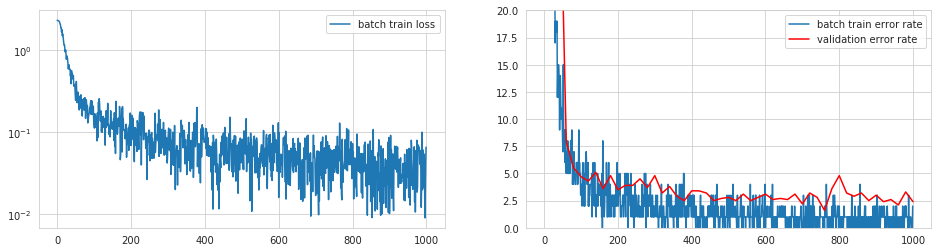

In [6]:
batch_loader = mnist_loader(deg[30], batch_size, data)

hexnet = HEX(dim=224, num_classes=10, alex_pretrained=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(hexnet.parameters(), lr=0.001, weight_decay=0.001)

train(hexnet, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)

In [7]:
save_model(hexnet, 'HEX_MNIST_30')

Training the model!
Params to learn:
	 nglcm.0.a
	 nglcm.0.b
	 nglcm.2.weight
	 nglcm.2.bias
	 cnn.features.0.weight
	 cnn.features.0.bias
	 cnn.features.3.weight
	 cnn.features.3.bias
	 cnn.features.6.weight
	 cnn.features.6.bias
	 cnn.features.8.weight
	 cnn.features.8.bias
	 cnn.features.10.weight
	 cnn.features.10.bias
	 cnn.classifier.1.weight
	 cnn.classifier.1.bias
	 cnn.classifier.4.weight
	 cnn.classifier.4.bias
	 classifier.weight
	 classifier.bias
You can interrupt it at any time.
Minibatch     10  | loss  2.03 | err rate 73.00%
Minibatch     20  | loss  1.11 | err rate 35.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 36.00% | doing  50 epochs
----------------------------------------------------------
Minibatch     30  | loss  0.56 | err rate 16.00%
Minibatch     40  | loss  0.54 | err rate 16.00%
----------------------------------------------------------
After epoch  2 | valid err rate: 27.00% | doing  50 epochs
------------

Minibatch    570  | loss  0.09 | err rate  3.00%
Minibatch    580  | loss  0.09 | err rate  2.00%
----------------------------------------------------------
After epoch 29 | valid err rate:  2.10% | doing  50 epochs
----------------------------------------------------------
Minibatch    590  | loss  0.03 | err rate  0.00%
Minibatch    600  | loss  0.04 | err rate  2.00%
----------------------------------------------------------
After epoch 30 | valid err rate:  2.40% | doing  50 epochs
----------------------------------------------------------
Minibatch    610  | loss  0.03 | err rate  0.00%
Minibatch    620  | loss  0.11 | err rate  5.00%
----------------------------------------------------------
After epoch 31 | valid err rate:  2.90% | doing  50 epochs
----------------------------------------------------------
Minibatch    630  | loss  0.06 | err rate  1.00%
Minibatch    640  | loss  0.05 | err rate  1.00%
----------------------------------------------------------
After epoch 32 | v

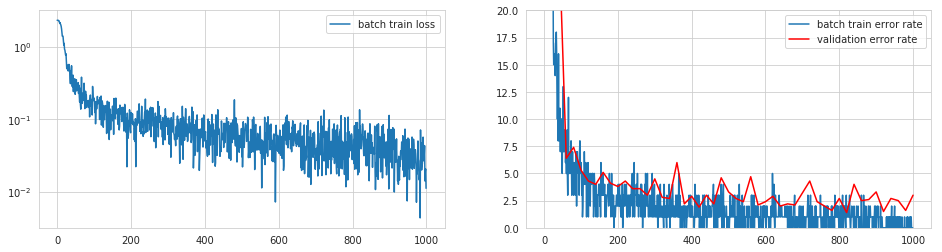

In [3]:
batch_loader = mnist_loader(deg[45], batch_size, data)

hexnet = HEX(dim=224, num_classes=10, alex_pretrained=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(hexnet.parameters(), lr=0.001, weight_decay=0.001)

train(hexnet, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)

In [4]:
save_model(hexnet, 'HEX_MNIST_45')

Training the model!
Params to learn:
	 nglcm.0.a
	 nglcm.0.b
	 nglcm.2.weight
	 nglcm.2.bias
	 cnn.features.0.weight
	 cnn.features.0.bias
	 cnn.features.3.weight
	 cnn.features.3.bias
	 cnn.features.6.weight
	 cnn.features.6.bias
	 cnn.features.8.weight
	 cnn.features.8.bias
	 cnn.features.10.weight
	 cnn.features.10.bias
	 cnn.classifier.1.weight
	 cnn.classifier.1.bias
	 cnn.classifier.4.weight
	 cnn.classifier.4.bias
	 classifier.weight
	 classifier.bias
You can interrupt it at any time.
Minibatch     10  | loss  2.02 | err rate 77.00%
Minibatch     20  | loss  1.30 | err rate 42.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 65.70% | doing  50 epochs
----------------------------------------------------------
Minibatch     30  | loss  0.72 | err rate 22.00%
Minibatch     40  | loss  0.43 | err rate 15.00%
----------------------------------------------------------
After epoch  2 | valid err rate: 15.60% | doing  50 epochs
------------

Minibatch    570  | loss  0.03 | err rate  1.00%
Minibatch    580  | loss  0.01 | err rate  0.00%
----------------------------------------------------------
After epoch 29 | valid err rate:  3.50% | doing  50 epochs
----------------------------------------------------------
Minibatch    590  | loss  0.06 | err rate  1.00%
Minibatch    600  | loss  0.05 | err rate  2.00%
----------------------------------------------------------
After epoch 30 | valid err rate:  2.70% | doing  50 epochs
----------------------------------------------------------
Minibatch    610  | loss  0.06 | err rate  1.00%
Minibatch    620  | loss  0.09 | err rate  2.00%
----------------------------------------------------------
After epoch 31 | valid err rate:  3.60% | doing  50 epochs
----------------------------------------------------------
Minibatch    630  | loss  0.09 | err rate  3.00%
Minibatch    640  | loss  0.09 | err rate  4.00%
----------------------------------------------------------
After epoch 32 | v

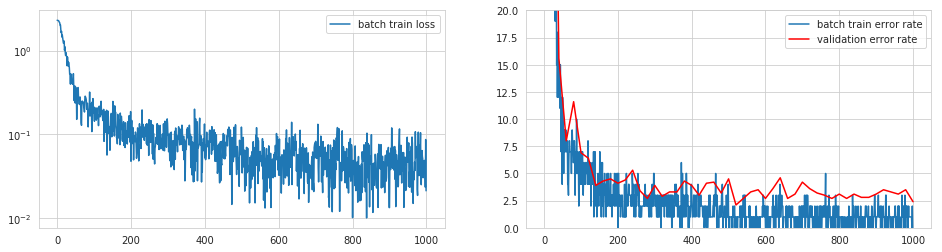

In [5]:
batch_loader = mnist_loader(deg[60], batch_size, data)

hexnet = HEX(dim=224, num_classes=10, alex_pretrained=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(hexnet.parameters(), lr=0.001, weight_decay=0.001)

train(hexnet, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)

In [6]:
save_model(hexnet, 'HEX_MNIST_60')

Training the model!
Params to learn:
	 nglcm.0.a
	 nglcm.0.b
	 nglcm.2.weight
	 nglcm.2.bias
	 cnn.features.0.weight
	 cnn.features.0.bias
	 cnn.features.3.weight
	 cnn.features.3.bias
	 cnn.features.6.weight
	 cnn.features.6.bias
	 cnn.features.8.weight
	 cnn.features.8.bias
	 cnn.features.10.weight
	 cnn.features.10.bias
	 cnn.classifier.1.weight
	 cnn.classifier.1.bias
	 cnn.classifier.4.weight
	 cnn.classifier.4.bias
	 classifier.weight
	 classifier.bias
You can interrupt it at any time.
Minibatch     10  | loss  1.65 | err rate 58.00%
Minibatch     20  | loss  0.80 | err rate 22.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 46.20% | doing  50 epochs
----------------------------------------------------------
Minibatch     30  | loss  0.54 | err rate 15.00%
Minibatch     40  | loss  0.39 | err rate 12.00%
----------------------------------------------------------
After epoch  2 | valid err rate: 40.20% | doing  50 epochs
------------

Minibatch    570  | loss  0.05 | err rate  1.00%
Minibatch    580  | loss  0.06 | err rate  1.00%
----------------------------------------------------------
After epoch 29 | valid err rate: 13.70% | doing  50 epochs
----------------------------------------------------------
Minibatch    590  | loss  0.04 | err rate  1.00%
Minibatch    600  | loss  0.02 | err rate  0.00%
----------------------------------------------------------
After epoch 30 | valid err rate:  7.50% | doing  50 epochs
----------------------------------------------------------
Minibatch    610  | loss  0.05 | err rate  1.00%
Minibatch    620  | loss  0.08 | err rate  2.00%
----------------------------------------------------------
After epoch 31 | valid err rate:  9.70% | doing  50 epochs
----------------------------------------------------------
Minibatch    630  | loss  0.09 | err rate  1.00%
Minibatch    640  | loss  0.10 | err rate  2.00%
----------------------------------------------------------
After epoch 32 | v

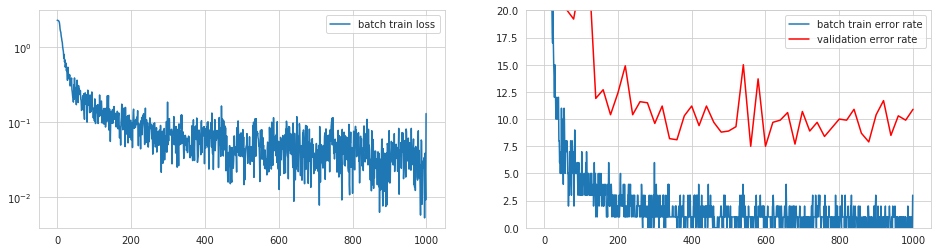

In [7]:
batch_loader = mnist_loader(deg[75], batch_size, data)

hexnet = HEX(dim=224, num_classes=10, alex_pretrained=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(hexnet.parameters(), lr=0.001, weight_decay=0.001)

train(hexnet, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)

In [8]:
save_model(hexnet, 'HEX_MNIST_75')

In [13]:
e_sum = 0

data = generate_degset(size=100, img_size=224)

net = HEX(dim=224, num_classes=10, alex_pretrained=False)

# '' or '_full' or '_extra'
var = '' 

for name in [0, 15, 30, 45, 60, 75]:
    load_model(net, 'HEX_MNIST_' + str(name) + var)
    if cuda:
        net.cuda()
    
    batch_loader = mnist_loader(deg[name], 256, data)
    
    res = compute_error_rate(net, batch_loader['test'], cuda)
    res = 100 - res
    print('HEX_MNIST rotation ', name, '° domain accuracy: ', res , "")
    e_sum += res

print('average accuracy for all: ', e_sum / 6.0)

HEX_MNIST rotation  0 ° domain accuracy:  92.3 
HEX_MNIST rotation  15 ° domain accuracy:  98.7 
HEX_MNIST rotation  30 ° domain accuracy:  97.1 
HEX_MNIST rotation  45 ° domain accuracy:  97.9 
HEX_MNIST rotation  60 ° domain accuracy:  96.5 
HEX_MNIST rotation  75 ° domain accuracy:  93.1 
average accuracy for all:  95.93333333333334
